<a href="https://colab.research.google.com/github/ThiagoGoncalves77/bibliotecaPandas/blob/main/DESAFIO%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Desafio: Construindo um modelo de Regressão para marketing***

Como parte da provocação feita no curso **Cientista de Dados da Escola DNC,** fui desafiado a criar um  modelo de Machine Learning utilizando Regressão Linear para prever o retorno em vendas com base nos investimentos feitos em diferentes plataformas de publicidade: YouTube, Facebook e Newspaper.

A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

# Outras Aplicações Práticas:

# 1. Previsão de Demanda de Produtos

Aplicação:
Usar a regressão linear para prever a demanda futura de produtos com base em variáveis como preço, campanhas promocionais e dados sazonais. Isso ajuda a ajustar estratégias de precificação e promoções para maximizar as vendas.

# 2. Estimativa de Lucro com Base em Canais de Distribuição

Cenário:
Uma empresa deseja estimar o lucro com base em diferentes canais de distribuição utilizados para seus produtos.


*São infinitas as aplicações...*

# Importando o dataset para o Google Colab

In [81]:
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT (1).csv


In [82]:
import pandas as pd


In [83]:
mkt = pd.read_csv('MKT.csv')
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# Análise Exploratória dos Dados
Nessa etapa vamos entender melhor como o dataset está ditribuido e fazer as alterações necessárias para o projeto.

In [84]:
mkt.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [85]:
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [86]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Vericamos que não temos dados nulos e que os tipos de dados estão corretos, não sendo necessário fazer qualquer alteração no dataset.

# Vamos importar algumas bibliotecas para visualização dos dados.
Nessa etapa, vamos tentar identificar alguns padrões utilizando alguns gráficos da biblioteca Seaborn.

In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks as cf

import plotly.express as px
import plotly.graph_objects as go

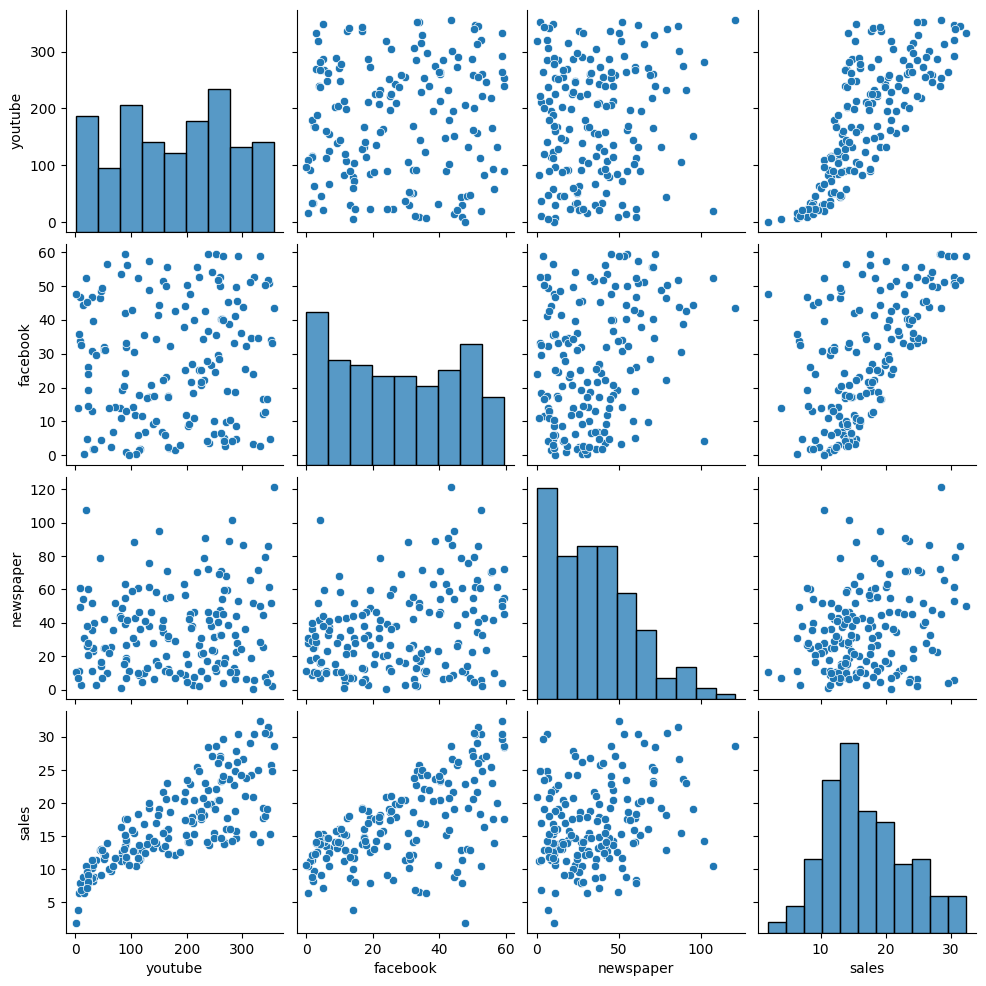

In [88]:
sns.pairplot(mkt)

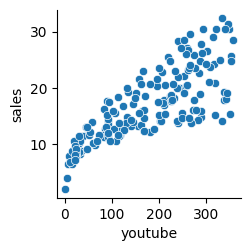

In [89]:
sns.pairplot(mkt, x_vars=['youtube'], y_vars='sales')


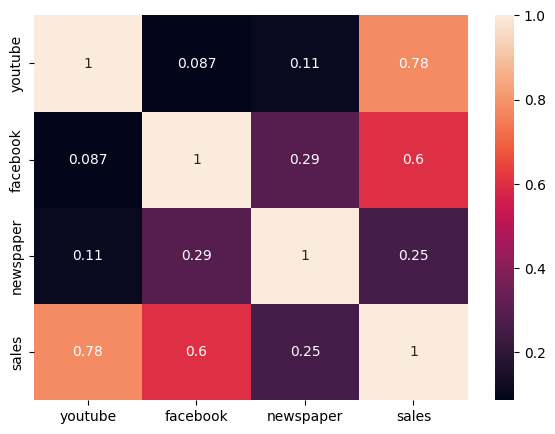

In [105]:
plt.figure(figsize=(7, 5))
sns.heatmap(mkt.corr(), annot=True)
plt.show()

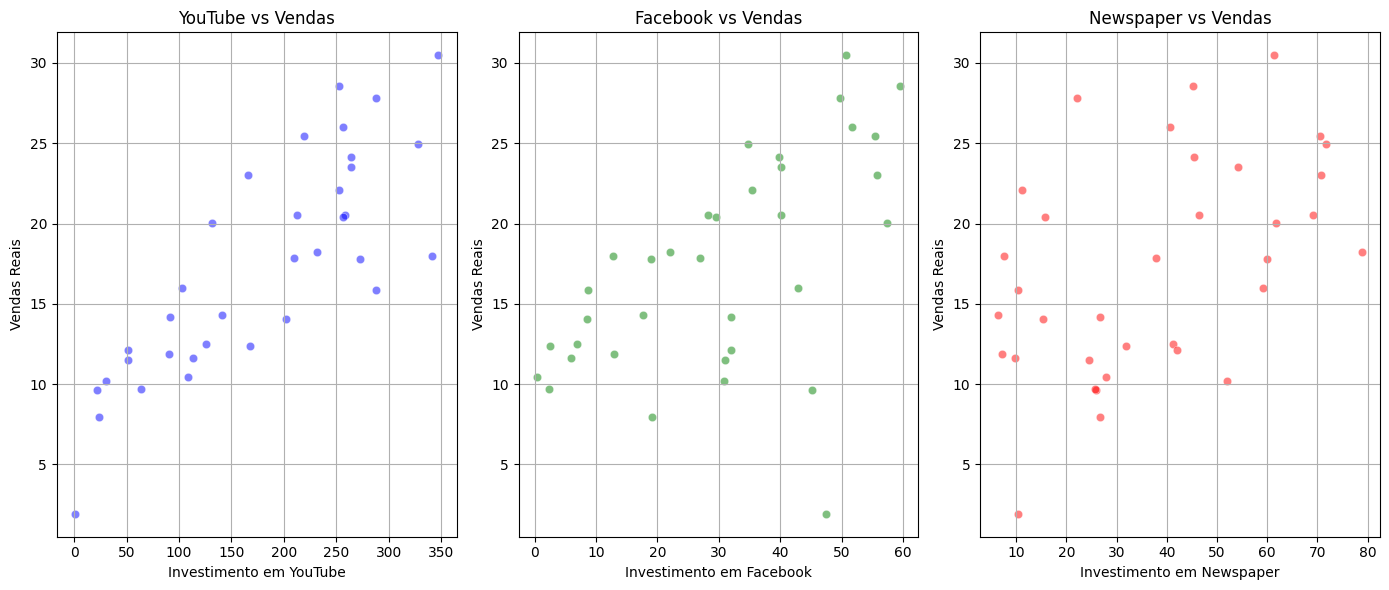

In [142]:
# Dados para o gráfico
plt.figure(figsize=(14, 6))

# Gráfico de dispersão para YouTube vs Vendas
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_results['YouTube'], y=df_results['Real'], color='blue', alpha=0.5)
plt.title('YouTube vs Vendas')
plt.xlabel('Investimento em YouTube')
plt.ylabel('Vendas Reais')
plt.grid(True)

# Gráfico de dispersão para Facebook vs Vendas
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_results['Facebook'], y=df_results['Real'], color='green', alpha=0.5)
plt.title('Facebook vs Vendas')
plt.xlabel('Investimento em Facebook')
plt.ylabel('Vendas Reais')
plt.grid(True)

# Gráfico de dispersão para Newspaper vs Vendas
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_results['Newspaper'], y=df_results['Real'], color='red', alpha=0.5)
plt.title('Newspaper vs Vendas')
plt.xlabel('Investimento em Newspaper')
plt.ylabel('Vendas Reais')
plt.grid(True)

plt.tight_layout()
plt.show()

Foi possivel analisar uma relação direta no número de vendas com os canais Youtube e Facebook.

# Regressão Linear Simples com o scikit-learn

Fizemos a análise exploratoria, definimos variáveis e percebemos que os dados já estão formatados e preparados para construir o modelo.

Nessa etapa, vamos importar bibliotecas e utilizar 20% dos dados para o teste.

In [106]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar as variáveis independentes (X) e dependentes (y)
X = mkt[['youtube', 'facebook', 'newspaper']]
y = mkt['sales']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Construindo e treinando o modelo de regressão.**

**Verificando as Métricas**

Mean Squared Error (MSE) - é a média dos quadrados dos error e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.

R-Squared - métrica popularmente usada para calcular a acurácia do modelo. Basicamente, calcula como o modelo se encaixa aos dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Coeficientes do modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

MSE: 5.576790234026718
R2 Score: 0.8728630857012158
Coeficientes: [ 4.54361665e+00  3.47882307e+00 -1.24622817e-03]
Intercepto: 16.82558823529412


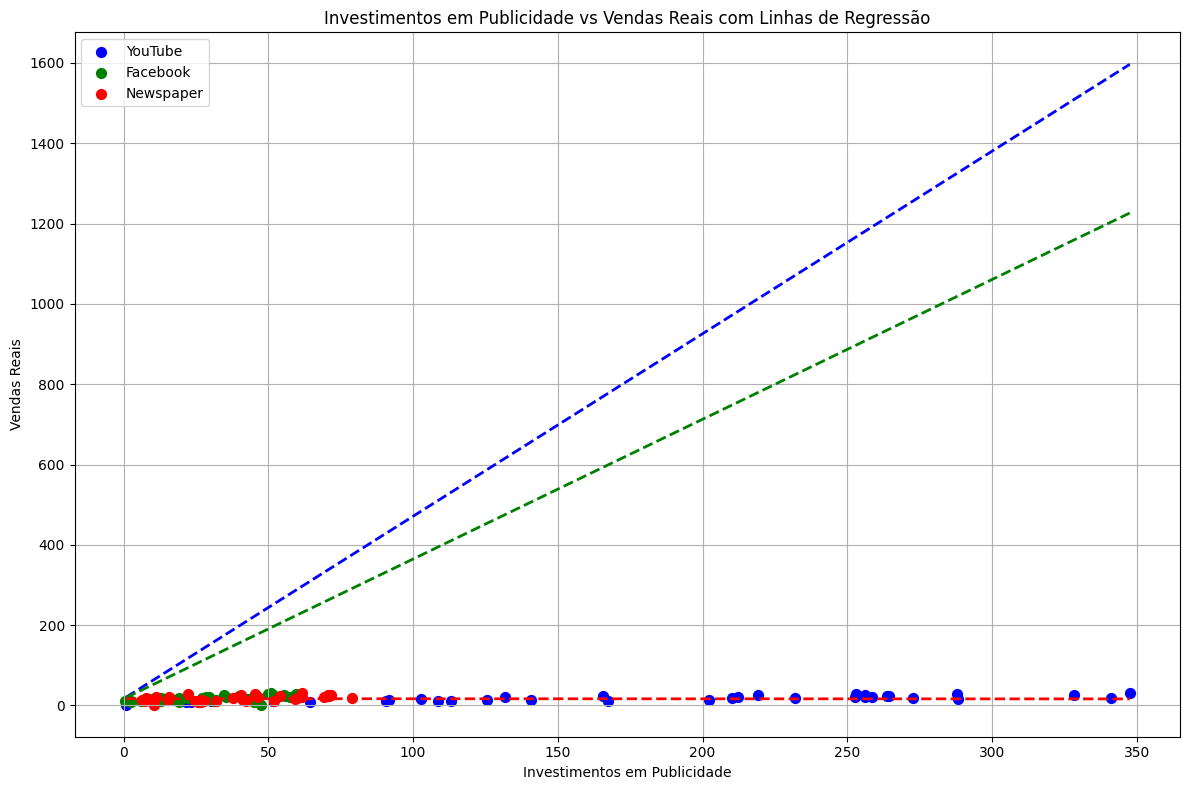

In [145]:
# Dados para o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Gráfico de dispersão e linha de regressão para YouTube
ax.scatter(df_results['YouTube'], df_results['Real'], s=50, color='blue', label='YouTube')
# Ajuste para a linha de regressão (baseado nos coeficientes do modelo)
x_vals = np.linspace(df_results['YouTube'].min(), df_results['YouTube'].max(), 100)
y_vals_youtube = model.coef_[0] * x_vals + model.intercept_
ax.plot(x_vals, y_vals_youtube, '--b', linewidth=2)

# Gráfico de dispersão e linha de regressão para Facebook
ax.scatter(df_results['Facebook'], df_results['Real'], s=50, color='green', label='Facebook')
# Ajuste para a linha de regressão (baseado nos coeficientes do modelo)
y_vals_facebook = model.coef_[1] * x_vals + model.intercept_
ax.plot(x_vals, y_vals_facebook, '--g', linewidth=2)

# Gráfico de dispersão e linha de regressão para Newspaper
ax.scatter(df_results['Newspaper'], df_results['Real'], s=50, color='red', label='Newspaper')
# Ajuste para a linha de regressão (baseado nos coeficientes do modelo)
y_vals_newspaper = model.coef_[2] * x_vals + model.intercept_
ax.plot(x_vals, y_vals_newspaper, '--r', linewidth=2)

# Configurações adicionais do gráfico
ax.set_ylabel("Vendas Reais")
ax.set_xlabel("Investimentos em Publicidade")
ax.set_title("Investimentos em Publicidade vs Vendas Reais com Linhas de Regressão")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


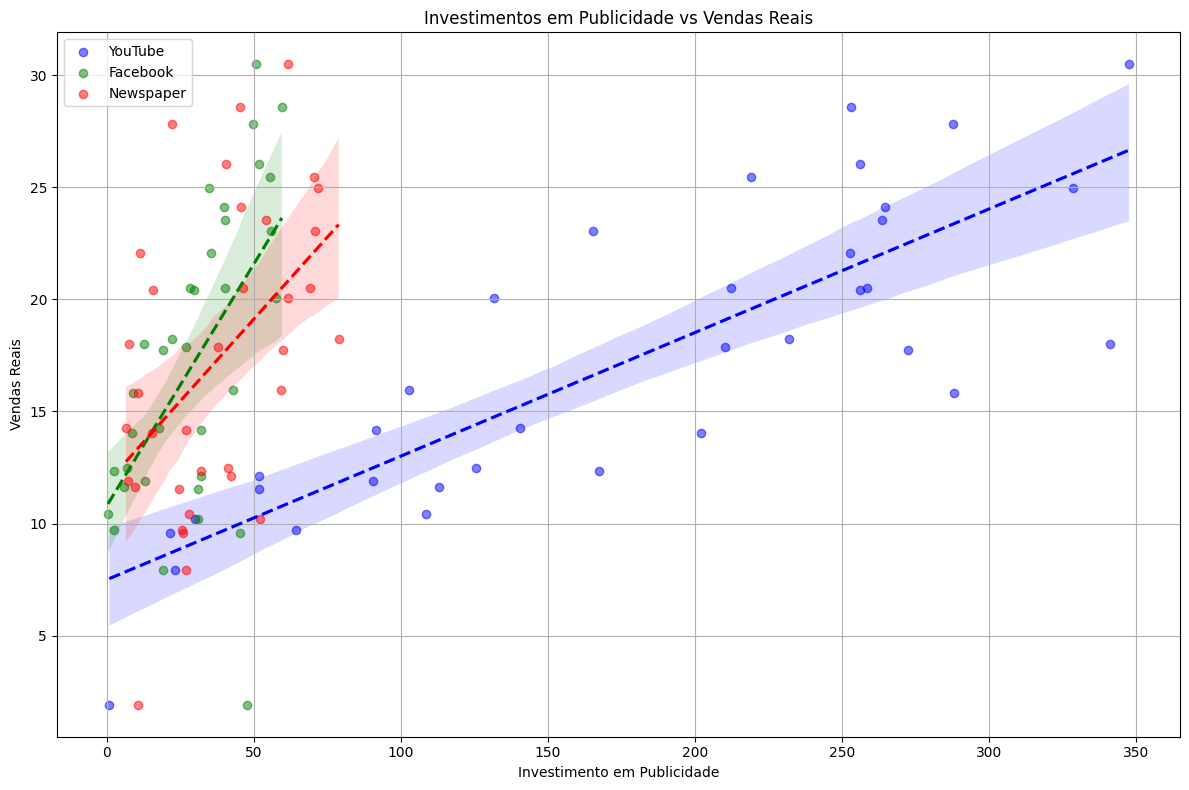

In [144]:
# Dados para o gráfico
plt.figure(figsize=(12, 8))

# Gráfico de dispersão para YouTube vs Vendas com linha de regressão
sns.regplot(x=df_results['YouTube'], y=df_results['Real'], scatter_kws={'color': 'blue', 'alpha': 0.5},
            line_kws={'color': 'blue', 'linestyle': '--'}, label='YouTube')

# Gráfico de dispersão para Facebook vs Vendas com linha de regressão
sns.regplot(x=df_results['Facebook'], y=df_results['Real'], scatter_kws={'color': 'green', 'alpha': 0.5},
            line_kws={'color': 'green', 'linestyle': '--'}, label='Facebook')

# Gráfico de dispersão para Newspaper vs Vendas com linha de regressão
sns.regplot(x=df_results['Newspaper'], y=df_results['Real'], scatter_kws={'color': 'red', 'alpha': 0.5},
            line_kws={'color': 'red', 'linestyle': '--'}, label='Newspaper')

plt.title('Investimentos em Publicidade vs Vendas Reais')
plt.xlabel('Investimento em Publicidade')
plt.ylabel('Vendas Reais')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [127]:
df_X_test = pd.DataFrame(X_test, columns=['YouTube', 'Facebook', 'Newspaper'])

In [135]:
# Certifique-se de que y_test e y_pred são arrays NumPy
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
y_pred = np.array(y_pred)  # Garantir que y_pred seja um array NumPy

# Criar o DataFrame df_results
df_results = pd.DataFrame({
    'Real': y_test,
    'Predito': y_pred,
    'YouTube': X_test['youtube'],
    'Facebook': X_test['facebook'],
    'Newspaper': X_test['newspaper']
})

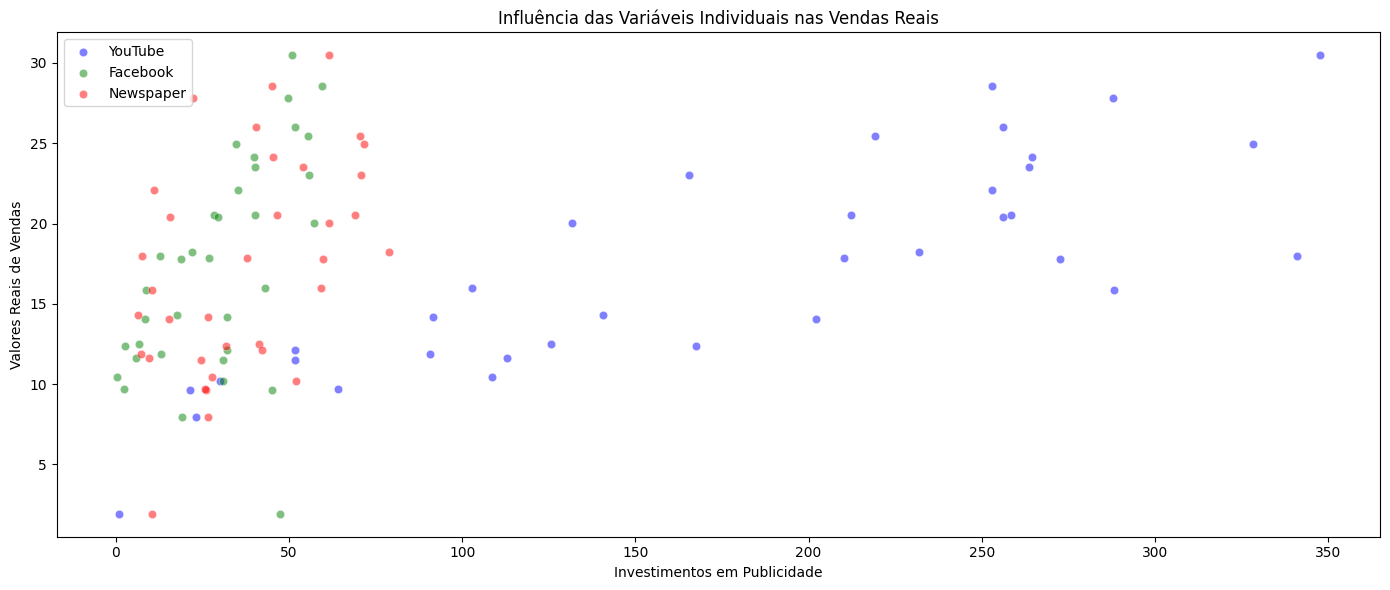

In [136]:
# Plotar o gráfico
plt.figure(figsize=(14, 6))

# Gráfico: Relação com Variáveis Individuais
sns.scatterplot(x=df_results['YouTube'], y=df_results['Real'], color='blue', label='YouTube', alpha=0.5)
sns.scatterplot(x=df_results['Facebook'], y=df_results['Real'], color='green', label='Facebook', alpha=0.5)
sns.scatterplot(x=df_results['Newspaper'], y=df_results['Real'], color='red', label='Newspaper', alpha=0.5)

plt.xlabel('Investimentos em Publicidade')
plt.ylabel('Valores Reais de Vendas')
plt.title('Influência das Variáveis Individuais nas Vendas Reais')
plt.legend()

plt.tight_layout()
plt.show()

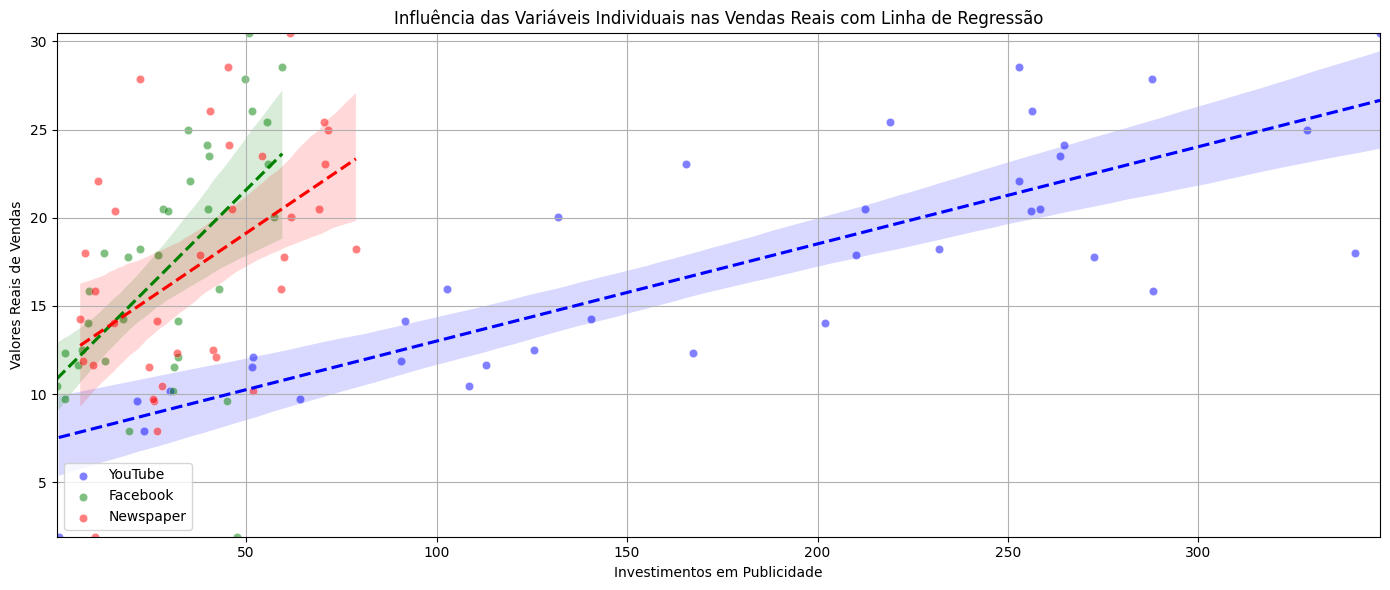

In [141]:
plt.figure(figsize=(14, 6))

# Gráfico: Relação com Variáveis Individuais
sns.scatterplot(x=df_results['YouTube'], y=df_results['Real'], color='blue', label='YouTube', alpha=0.5)
sns.regplot(x=df_results['YouTube'], y=df_results['Real'], scatter=False, color='blue', line_kws={"linestyle": "--", "color": "blue"})

sns.scatterplot(x=df_results['Facebook'], y=df_results['Real'], color='green', label='Facebook', alpha=0.5)
sns.regplot(x=df_results['Facebook'], y=df_results['Real'], scatter=False, color='green', line_kws={"linestyle": "--", "color": "green"})

sns.scatterplot(x=df_results['Newspaper'], y=df_results['Real'], color='red', label='Newspaper', alpha=0.5)
sns.regplot(x=df_results['Newspaper'], y=df_results['Real'], scatter=False, color='red', line_kws={"linestyle": "--", "color": "red"})

plt.xlabel('Investimentos em Publicidade')
plt.ylabel('Valores Reais de Vendas')
plt.title('Influência das Variáveis Individuais nas Vendas Reais com Linha de Regressão')
plt.legend()
plt.grid(True)

# Ajustar os limites dos eixos se necessário
plt.xlim(df_results[['YouTube', 'Facebook', 'Newspaper']].min().min(), df_results[['YouTube', 'Facebook', 'Newspaper']].max().max())
plt.ylim(df_results['Real'].min(), df_results['Real'].max())

plt.tight_layout()
plt.show()

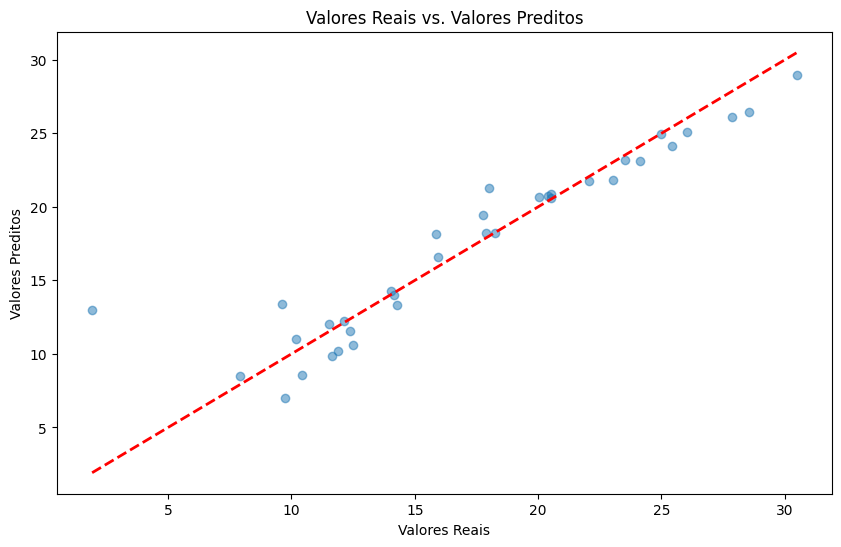

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 5.576790234026718
RMSE: 2.361522863329237
R² Score: 0.8728630857012158


In [110]:
print("Coeficientes do modelo:", model.coef_)
print("Intercepto do modelo:", model.intercept_)

Coeficientes do modelo: [ 4.54361665e+00  3.47882307e+00 -1.24622817e-03]
Intercepto do modelo: 16.82558823529412


In [114]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Regressão Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
ridge_y_pred = ridge_model.predict(X_test_scaled)
print("Ridge R² Score:", r2_score(y_test, ridge_y_pred))

# Regressão Lasso
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_model.predict(X_test_scaled)
print("Lasso R² Score:", r2_score(y_test, lasso_y_pred))

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, rf_y_pred))

Ridge R² Score: 0.8726061767919275
Lasso R² Score: 0.8201845418455567
Random Forest R² Score: 0.9762099922176569


In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R² Scores para cada fold:", scores)
print("Média dos R² Scores:", scores.mean())

R² Scores para cada fold: [0.91818687 0.88662841 0.85350533 0.89992827 0.90323431]
Média dos R² Scores: 0.8922966369742292


In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Exemplo para Ridge
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'alpha': 1.0}


In [117]:
new_investments = np.array([[1500, 3000, 2000]])
new_investments_scaled = scaler.transform(new_investments)
predicted_sales = model.predict(new_investments_scaled)
print("Previsão de vendas para novos investimentos:", predicted_sales)

Previsão de vendas para novos investimentos: [653.33006844]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Previsão de vendas para novos investimentos: [11937.09384794]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Text(0.5, 1.0, 'Previsão de Vendas com Novos Investimentos')

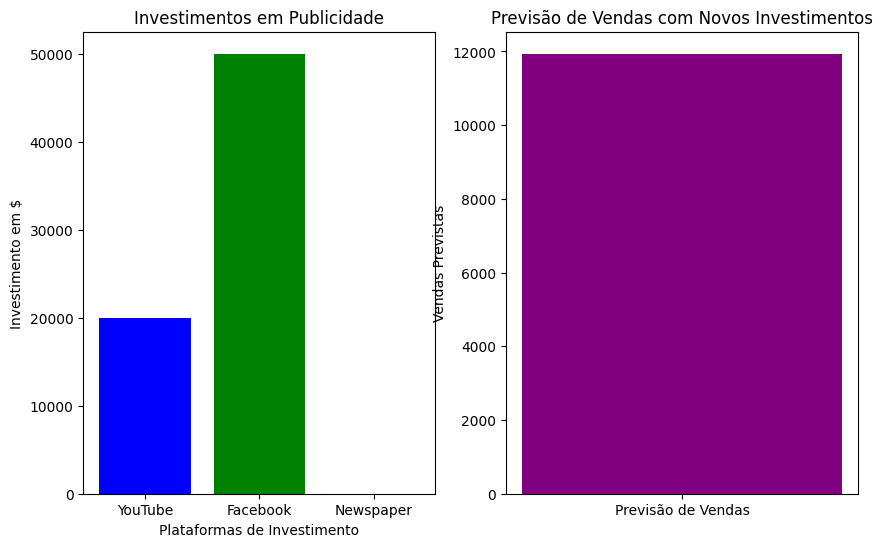

In [123]:
new_investments = np.array([[50000, 50000, 0]])

# Normalizar os novos dados
new_investments_scaled = scaler.transform(new_investments)

# Fazer a previsão
predicted_sales = model.predict(new_investments_scaled)
print("Previsão de vendas para novos investimentos:", predicted_sales)

# Plotar os resultados
# Dados para o gráfico
platforms = ['YouTube', 'Facebook', 'Newspaper']
investment_values = [20000, 50000, 0]  # Valores dos novos investimentos
predicted_sales_values = predicted_sales[0]  # Valor previsto para novos investimentos

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar investimentos
plt.subplot(1, 2, 1)
plt.bar(platforms, investment_values, color=['blue', 'green', 'red'])
plt.xlabel('Plataformas de Investimento')
plt.ylabel('Investimento em $')
plt.title('Investimentos em Publicidade')

# Plotar previsões
plt.subplot(1, 2, 2)
plt.bar(['Previsão de Vendas'], [predicted_sales_values], color='purple')
plt.ylabel('Vendas Previstas')
plt.title('Previsão de Vendas com Novos Investimentos')

In [111]:
# Coletar os coeficientes do modelo
coefficients = model.coef_

# Nome das variáveis
variable_names = ['YouTube', 'Facebook', 'Newspaper']

# Exibir os coeficientes com os nomes das variáveis
for name, coef in zip(variable_names, coefficients):
    print(f"{name}: {coef}")

YouTube: 4.543616646668393
Facebook: 3.4788230749837474
Newspaper: -0.0012462281691685284


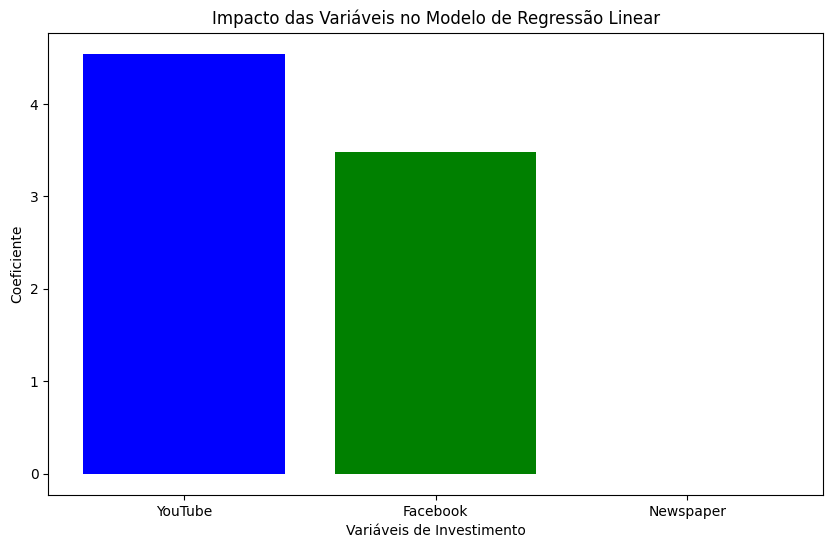

In [112]:
import matplotlib.pyplot as plt

# Coletar os coeficientes do modelo
coefficients = [4.5436, 3.4788, -0.0012]

# Nome das variáveis
variable_names = ['YouTube', 'Facebook', 'Newspaper']

# Criar um gráfico de barras para os coeficientes
plt.figure(figsize=(10, 6))
plt.bar(variable_names, coefficients, color=['blue', 'green', 'red'])
plt.xlabel('Variáveis de Investimento')
plt.ylabel('Coeficiente')
plt.title('Impacto das Variáveis no Modelo de Regressão Linear')
plt.show()